In [1]:
import pandas as pd
import numpy as mp
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv('cleaned-data.csv')
df

,Unnamed: 0,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,0,67,male,single,1,own,4,skilled employee / official,7 years,1,...,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,1,...,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,2,49,male,single,2,own,3,unskilled - resident,4 years,1,...,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,3,45,male,single,2,for free,4,skilled employee / official,4 years,1,...,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,4,53,male,single,2,for free,4,skilled employee / official,1 year,1,...,24,new vehicle,4870000,3,car or other,0,0,2,delay in paying off loans in the past,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,1,...,12,FF&E,1736000,3,real estate,0,0,1,existing loans paid back duly till now,0
996,996,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,1,...,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,0
997,997,38,male,single,1,own,4,skilled employee / official,7 years,1,...,12,electronic equipment,804000,4,car or other,0,0,1,existing loans paid back duly till now,0
998,998,23,male,single,1,for free,4,skilled employee / official,1 year,1,...,45,electronic equipment,1845000,4,car or other,0,0,1,existing loans paid back duly till now,1


In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Primary_applicant_age_in_years                            1000 non-null   int64 
 1   Gender                                                    1000 non-null   object
 2   Marital_status                                            1000 non-null   object
 3   Number_of_dependents                                      1000 non-null   int64 
 4   Housing                                                   1000 non-null   object
 5   Years_at_current_residence                                1000 non-null   int64 
 6   Employment_status                                         1000 non-null   object
 7   Has_been_employed_for_at_least                            1000 non-null   object
 8   Foreign_worker               

# DATA CLEANING AND PREPROCESSING

In [5]:
le=LabelEncoder()

In [6]:
df['Gender']

0        male
1      female
2        male
3        male
4        male
        ...  
995    female
996      male
997      male
998      male
999      male
Name: Gender, Length: 1000, dtype: object

In [7]:
le.fit(df['Gender'])
Gender_map = dict(zip(le.classes_,le.transform(le.classes_)))
Gender_map

{'female': 0, 'male': 1}

In [8]:
df['Gender']=le.fit_transform(df['Gender'])
df['Gender']

0      1
1      0
2      1
3      1
4      1
      ..
995    0
996    1
997    1
998    1
999    1
Name: Gender, Length: 1000, dtype: int32

In [9]:
#df['Gender']=df['Gender']. astype('category')
#df['Gender'].dtype

In [10]:
df['Marital_status'].unique()

array(['single', 'divorced/separated/married', 'divorced/separated',
       'married/widowed'], dtype=object)

In [11]:
le.fit(df['Marital_status'])
M_map = dict(zip(le.classes_,le.transform(le.classes_)))
M_map

{'divorced/separated': 0,
 'divorced/separated/married': 1,
 'married/widowed': 2,
 'single': 3}

In [12]:
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Marital_status']

0      3
1      1
2      3
3      3
4      3
      ..
995    1
996    0
997    3
998    3
999    3
Name: Marital_status, Length: 1000, dtype: int32

In [13]:
#df['Marital_status']=df['Marital_status']. astype('category')
#df['Marital_status'].dtype

In [14]:
df['Housing'].unique()

array(['own', 'for free', 'rent'], dtype=object)

In [15]:
le.fit(df['Housing'])
Ho_map = dict(zip(le.classes_,le.transform(le.classes_)))
Ho_map

{'for free': 0, 'own': 1, 'rent': 2}

In [16]:
df['Housing']=le.fit_transform(df['Housing'])
df['Housing']

0      1
1      1
2      1
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Housing, Length: 1000, dtype: int32

In [17]:
#df['Housing']=df['Housing']. astype('category')
df['Housing'].dtype

dtype('int32')

In [18]:
print(df['Employment_status'].unique())
le.fit(df['Employment_status'])
Emp_map = dict(zip(le.classes_,le.transform(le.classes_)))
print(Emp_map)
df['Employment_status']=le.fit_transform(df['Employment_status'])
print(df['Employment_status'])
#df['Employment_status']=df['Employment_status']. astype('category')
df['Employment_status'].dtype

['skilled employee / official' 'unskilled - resident'
 'management / self-employed / highly qualified employee / officer'
 'unemployed / unskilled - non-resident']
{'management / self-employed / highly qualified employee / officer': 0, 'skilled employee / official': 1, 'unemployed / unskilled - non-resident': 2, 'unskilled - resident': 3}
0      1
1      1
2      3
3      1
4      1
      ..
995    3
996    0
997    1
998    1
999    1
Name: Employment_status, Length: 1000, dtype: int32


dtype('int32')

In [19]:
df['Has_been_employed_for_at_least'].unique()

array(['7 years', '1 year', '4 years', '0 year'], dtype=object)

In [20]:
df['Has_been_employed_for_at_least'] = df['Has_been_employed_for_at_least'].replace('7 years',7)
df['Has_been_employed_for_at_least'] = df['Has_been_employed_for_at_least'].replace('1 year',1)
df['Has_been_employed_for_at_least'] = df['Has_been_employed_for_at_least'].replace('4 years',4)
df['Has_been_employed_for_at_least'] = df['Has_been_employed_for_at_least'].replace('0 year',0)
df['Has_been_employed_for_at_least'].head()



0    7
1    1
2    4
3    4
4    1
Name: Has_been_employed_for_at_least, dtype: int64

In [21]:
print(df['Savings_account_balance'].unique())
le.fit(df['Savings_account_balance'])
Sav_map = dict(zip(le.classes_,le.transform(le.classes_)))
print(Sav_map)
df['Savings_account_balance']=le.fit_transform(df['Savings_account_balance'])
print(df['Savings_account_balance'])
#df['Savings_account_balance']=df['Savings_account_balance']. astype('category')
df['Savings_account_balance'].dtype

['Low' 'High' 'Very high' 'Medium']
{'High': 0, 'Low': 1, 'Medium': 2, 'Very high': 3}
0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    2
Name: Savings_account_balance, Length: 1000, dtype: int32


dtype('int32')

In [22]:
print(df['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].unique())
le.fit(df['Balance_in_existing_bank_account_(lower_limit_of_bucket)'])
Bal_l_map = dict(zip(le.classes_,le.transform(le.classes_)))
print(Bal_l_map)
df['Balance_in_existing_bank_account_(lower_limit_of_bucket)']=le.fit_transform(df['Balance_in_existing_bank_account_(lower_limit_of_bucket)'])
print(df['Balance_in_existing_bank_account_(lower_limit_of_bucket)'])
#df['Balance_in_existing_bank_account_(lower_limit_of_bucket)']=df['Balance_in_existing_bank_account_(lower_limit_of_bucket)']. astype('category')
df['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].dtype

['0' '2 lac']
{'0': 0, '2 lac': 1}
0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Balance_in_existing_bank_account_(lower_limit_of_bucket), Length: 1000, dtype: int32


dtype('int32')

In [23]:
print(df['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].unique())
le.fit(df['Balance_in_existing_bank_account_(upper_limit_of_bucket)'])
Bal_u_map = dict(zip(le.classes_,le.transform(le.classes_)))
print(Bal_u_map)
df['Balance_in_existing_bank_account_(upper_limit_of_bucket)']=le.fit_transform(df['Balance_in_existing_bank_account_(upper_limit_of_bucket)'])
print(df['Balance_in_existing_bank_account_(upper_limit_of_bucket)'])
#df['Balance_in_existing_bank_account_(upper_limit_of_bucket)']=df['Balance_in_existing_bank_account_(upper_limit_of_bucket)']. astype('category')
df['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].dtype

['0' '2 lac']
{'0': 0, '2 lac': 1}
0      0
1      1
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    1
Name: Balance_in_existing_bank_account_(upper_limit_of_bucket), Length: 1000, dtype: int32


dtype('int32')

In [24]:
print(df['Purpose'].unique())
le.fit(df['Purpose'])
Pu_map = dict(zip(le.classes_,le.transform(le.classes_)))
print(Pu_map)
df['Purpose']=le.fit_transform(df['Purpose'])
print(df['Purpose'])
#df['Purpose']=df['Purpose']. astype('category')
df['Purpose'].dtype

['electronic equipment' 'education' 'FF&E' 'new vehicle' 'used vehicle'
 'business' 'domestic appliances' 'repair costs' 'career development']
{'FF&E': 0, 'business': 1, 'career development': 2, 'domestic appliances': 3, 'education': 4, 'electronic equipment': 5, 'new vehicle': 6, 'repair costs': 7, 'used vehicle': 8}
0      5
1      5
2      4
3      0
4      6
      ..
995    0
996    8
997    5
998    5
999    8
Name: Purpose, Length: 1000, dtype: int32


dtype('int32')

In [25]:
print(df['Property'].unique())
le.fit(df['Property'])
Pr_map = dict(zip(le.classes_,le.transform(le.classes_)))
print(Pr_map)
df['Property']=le.fit_transform(df['Property'])
print(df['Property'])
#df['Property']=df['Property']. astype('category')
df['Property'].dtype

['real estate' 'building society savings agreement/life insurance'
 'car or other']
{'building society savings agreement/life insurance': 0, 'car or other': 1, 'real estate': 2}
0      2
1      2
2      2
3      0
4      1
      ..
995    2
996    0
997    1
998    1
999    1
Name: Property, Length: 1000, dtype: int32


dtype('int32')

In [26]:
print(df['Loan_history'].unique())
le.fit(df['Loan_history'])
l_map = dict(zip(le.classes_,le.transform(le.classes_)))
print(l_map)
df['Loan_history']=le.fit_transform(df['Loan_history'])
print(df['Loan_history'])
#df['Loan_history']=df['Loan_history']. astype('category')
df['Loan_history'].dtype

['critical/pending loans at other banks'
 'existing loans paid back duly till now'
 'delay in paying off loans in the past'
 'no loans taken/all loans paid back duly'
 'all loans at this bank paid back duly']
{'all loans at this bank paid back duly': 0, 'critical/pending loans at other banks': 1, 'delay in paying off loans in the past': 2, 'existing loans paid back duly till now': 3, 'no loans taken/all loans paid back duly': 4}
0      1
1      3
2      1
3      3
4      2
      ..
995    3
996    3
997    3
998    3
999    1
Name: Loan_history, Length: 1000, dtype: int32


dtype('int32')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   Primary_applicant_age_in_years                            1000 non-null   int64
 1   Gender                                                    1000 non-null   int32
 2   Marital_status                                            1000 non-null   int32
 3   Number_of_dependents                                      1000 non-null   int64
 4   Housing                                                   1000 non-null   int32
 5   Years_at_current_residence                                1000 non-null   int64
 6   Employment_status                                         1000 non-null   int32
 7   Has_been_employed_for_at_least                            1000 non-null   int64
 8   Foreign_worker                         

In [28]:
df.corr()

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Foreign_worker,Savings_account_balance,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
Primary_applicant_age_in_years,1.000000,0.161694,0.147954,0.118201,-0.301419,0.266419,-0.001637,0.326622,0.006151,-0.028719,...,-0.036136,0.125098,0.032716,0.058266,0.024190,-0.018357,-0.023923,0.149254,-0.157261,-0.091127
Gender,0.161694,1.000000,0.748342,0.203431,-0.219844,-0.013818,-0.041278,0.192245,-0.051202,-0.043936,...,0.081432,0.070887,0.093482,0.086302,0.016628,0.007742,0.010907,0.094260,-0.059183,-0.075493
Marital_status,0.147954,0.748342,1.000000,0.256475,-0.225034,0.041256,-0.025732,0.216697,-0.046226,-0.055173,...,0.093721,0.112561,0.102481,0.138389,-0.030042,0.026430,0.016897,0.111867,-0.083229,-0.095055
Number_of_dependents,0.118201,0.203431,0.256475,1.000000,-0.114508,0.042643,0.127146,0.095999,-0.077071,-0.000379,...,-0.023834,0.101414,0.017142,-0.071207,0.016420,-0.032817,0.036589,0.109667,-0.070008,-0.003015
Housing,-0.301419,-0.219844,-0.225034,-0.114508,1.000000,-0.011941,0.106596,-0.145218,-0.063582,0.033433,...,-0.157049,-0.124235,-0.135632,-0.089405,0.016984,0.038835,0.053505,-0.048591,0.084026,0.019315
Years_at_current_residence,0.266419,-0.013818,0.041256,0.042643,-0.011941,1.000000,0.000450,0.292062,0.054097,-0.006098,...,0.034067,0.067490,0.028926,0.049302,-0.039608,0.001623,-0.028334,0.089625,-0.086987,0.002967
Employment_status,-0.001637,-0.041278,-0.025732,0.127146,0.106596,0.000450,1.000000,-0.085571,-0.100028,0.003149,...,-0.215438,-0.039119,-0.261139,-0.078090,0.154159,-0.027902,0.079757,0.004544,-0.013921,-0.032756
Has_been_employed_for_at_least,0.326622,0.192245,0.216697,0.095999,-0.145218,0.292062,-0.085571,1.000000,0.047555,0.002100,...,0.057434,0.080733,0.012550,0.134467,-0.032008,-0.016498,-0.022660,0.144036,-0.134492,-0.105589
Foreign_worker,0.006151,-0.051202,-0.046226,-0.077071,-0.063582,0.054097,-0.100028,0.047555,1.000000,-0.036077,...,0.138196,-0.050304,0.050050,0.090024,-0.045555,-0.066338,-0.097256,0.009717,0.000513,0.082079
Savings_account_balance,-0.028719,-0.043936,-0.055173,-0.000379,0.033433,-0.006098,0.003149,0.002100,-0.036077,1.000000,...,0.008286,0.011638,-0.006893,0.027124,0.017278,0.020980,-0.023746,0.046514,-0.033540,-0.021722


<AxesSubplot:>

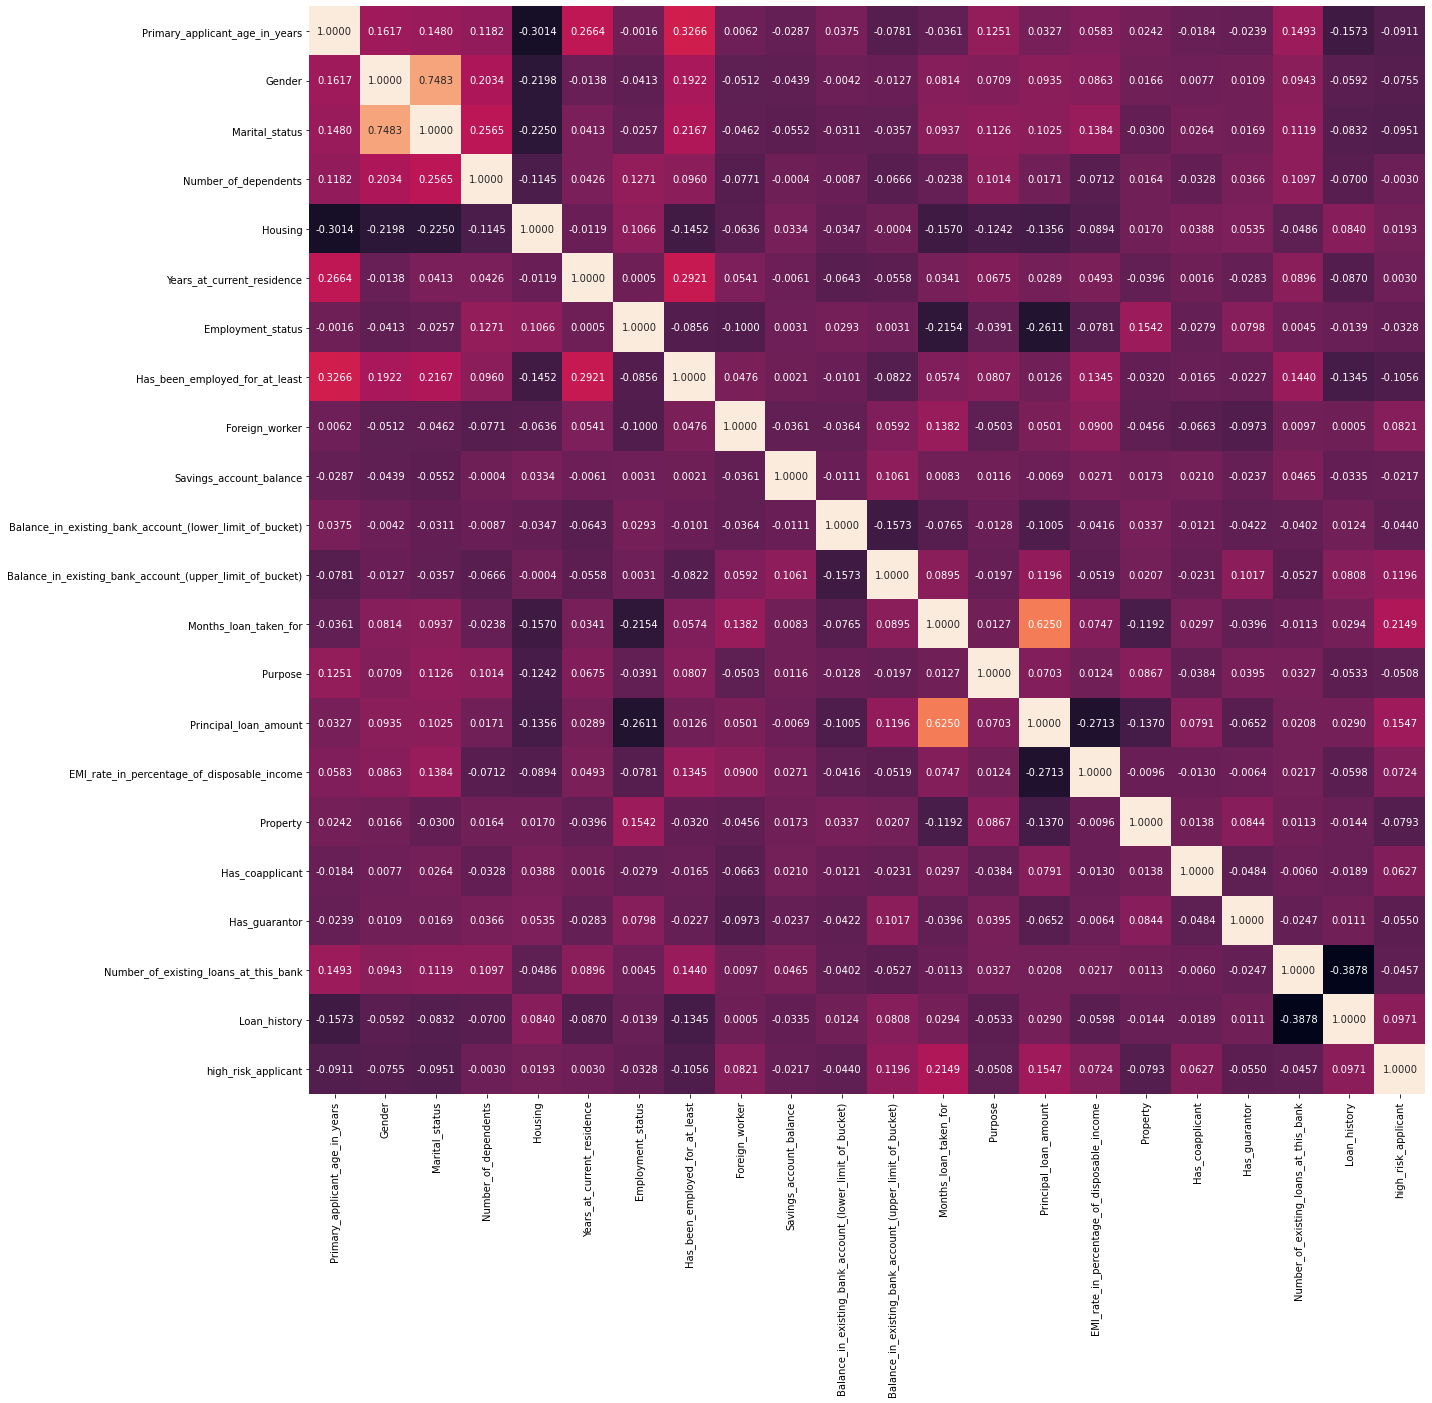

In [29]:
fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(df.corr(), annot=True, fmt='.4f', cbar=False, ax=ax)

In [30]:
X = df.drop(['high_risk_applicant'], axis=1)
y = df['high_risk_applicant']

In [33]:
X

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Foreign_worker,Savings_account_balance,...,Balance_in_existing_bank_account_(upper_limit_of_bucket),Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history
0,67,1,3,1,1,4,1,7,1,1,...,0,6,5,1169000,4,2,0,0,2,1
1,22,0,1,1,1,2,1,1,1,1,...,1,48,5,5951000,2,2,0,0,1,3
2,49,1,3,2,1,3,3,4,1,1,...,0,12,4,2096000,2,2,0,0,1,1
3,45,1,3,2,0,4,1,4,1,1,...,0,42,0,7882000,2,0,0,1,1,3
4,53,1,3,2,0,4,1,1,1,1,...,0,24,6,4870000,3,1,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,1,4,3,4,1,1,...,0,12,0,1736000,3,2,0,0,1,3
996,40,1,0,1,1,4,0,1,1,1,...,0,30,8,3857000,4,0,0,0,1,3
997,38,1,3,1,1,4,1,7,1,1,...,0,12,5,804000,4,1,0,0,1,3
998,23,1,3,1,0,4,1,1,1,1,...,0,45,5,1845000,4,1,0,0,1,3


In [38]:
scaler=StandardScaler()

In [40]:
scaler.fit(df)
scaled = scaler.transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

In [41]:
X['Principal_loan_amount']=scaled_df['Principal_loan_amount']
X

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Foreign_worker,Savings_account_balance,...,Balance_in_existing_bank_account_(upper_limit_of_bucket),Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history
0,67,1,3,1,1,4,1,7,1,1,...,0,6,5,-0.745131,4,2,0,0,2,1
1,22,0,1,1,1,2,1,1,1,1,...,1,48,5,0.949817,2,2,0,0,1,3
2,49,1,3,2,1,3,3,4,1,1,...,0,12,4,-0.416562,2,2,0,0,1,1
3,45,1,3,2,0,4,1,4,1,1,...,0,42,0,1.634247,2,0,0,1,1,3
4,53,1,3,2,0,4,1,1,1,1,...,0,24,6,0.566664,3,1,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,1,4,3,4,1,1,...,0,12,0,-0.544162,3,2,0,0,1,3
996,40,1,0,1,1,4,0,1,1,1,...,0,30,8,0.207612,4,0,0,0,1,3
997,38,1,3,1,1,4,1,7,1,1,...,0,12,5,-0.874503,4,1,0,0,1,3
998,23,1,3,1,0,4,1,1,1,1,...,0,45,5,-0.505528,4,1,0,0,1,3


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
pd.crosstab(y_train,'high_risk_applicant')

col_0,high_risk_applicant
high_risk_applicant,
0,559
1,241


In [44]:
pd.crosstab(y_test,'high_risk_applicant')

col_0,high_risk_applicant
high_risk_applicant,
0,141
1,59


In [45]:
pd.crosstab(y,'high_risk_applicant')

col_0,high_risk_applicant
high_risk_applicant,
0,700
1,300


In [46]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=.20, random_state=15)
cv

StratifiedShuffleSplit(n_splits=5, random_state=15, test_size=0.2,
            train_size=None)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
params = {
    'penalty': ['l1','l2'],
    'C': [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]
}
logreg = LogisticRegression(solver='liblinear')

grid = GridSearchCV(logreg, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=15, test_size=0.2,
            train_size=None),
             estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [49]:
logreg_grid_val_score = grid.best_score_
print('Best Score:', logreg_grid_val_score)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.7162499999999999
Best Params: {'C': 8, 'penalty': 'l2'}
Best Estimator: LogisticRegression(C=8, solver='liblinear')


In [50]:
logreg_grid = grid.best_estimator_
y_pred = logreg_grid.predict(X_test)

In [51]:
pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"] )

,Predicted A,Predicted T
Actual A,135,6
Actual T,45,14


In [52]:
knn_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', knn_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.745
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.96      0.84       141
           1       0.70      0.24      0.35        59

    accuracy                           0.74       200
   macro avg       0.72      0.60      0.60       200
weighted avg       0.74      0.74      0.70       200



In [53]:
from sklearn.naive_bayes import GaussianNB


In [54]:
params={}
gb = GaussianNB()
grid = GridSearchCV(gb, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=15, test_size=0.2,
            train_size=None),
             estimator=GaussianNB(), n_jobs=-1, param_grid={},
             scoring='accuracy', verbose=1)

In [55]:
gb_grid_val_score = grid.best_score_
print('Best Score:', gb_grid_val_score)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.6362500000000001
Best Estimator: GaussianNB()


In [56]:
gb_grid= grid.best_estimator_
y_pred = gb_grid.predict(X_test)

In [57]:
pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"] )

,Predicted A,Predicted T
Actual A,98,43
Actual T,27,32


In [58]:
gb_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', gb_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74       141
           1       0.43      0.54      0.48        59

    accuracy                           0.65       200
   macro avg       0.61      0.62      0.61       200
weighted avg       0.68      0.65      0.66       200



In [59]:
from sklearn.svm import SVC

In [60]:
params = {
    'C': [0.001, 0.01, 0.1, 1, 10], 
    'gamma' : [0.001,0.001, 0.01, 0.1, 1]
}

svc = SVC(kernel='rbf', probability=True) ## 'rbf' stands for gaussian kernel
grid = GridSearchCV(svc, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=15, test_size=0.2,
            train_size=None),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.001, 0.01, 0.1, 1]},
             scoring='accuracy', verbose=1)

In [61]:
svm_grid_val_score = grid.best_score_
print('Best Score:', svm_grid_val_score)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.7200000000000001
Best Params: {'C': 1, 'gamma': 0.01}
Best Estimator: SVC(C=1, gamma=0.01, probability=True)


In [62]:
svm_grid= grid.best_estimator_
y_pred = svm_grid.predict(X_test)

In [63]:
pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"] )

,Predicted A,Predicted T
Actual A,138,3
Actual T,53,6


In [64]:
svm_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', svm_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.98      0.83       141
           1       0.67      0.10      0.18        59

    accuracy                           0.72       200
   macro avg       0.69      0.54      0.50       200
weighted avg       0.71      0.72      0.64       200



In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
params = {
    'max_features': [1, 3, 10],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'criterion': ["entropy", "gini"]
}

dtc = DecisionTreeClassifier()
grid = GridSearchCV(dtc, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=15, test_size=0.2,
            train_size=None),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy', verbose=1)

In [67]:
dtc_grid_val_score = grid.best_score_
print('Best Score:', dtc_grid_val_score)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.70125
Best Params: {'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(max_features=1, min_samples_leaf=10)


In [68]:
dtc_grid= grid.best_estimator_
y_pred = dtc_grid.predict(X_test)

In [69]:
pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"] )

,Predicted A,Predicted T
Actual A,141,0
Actual T,59,0


In [70]:
dtc_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', dtc_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.705
Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.83       141
           1       0.00      0.00      0.00        59

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
params = {
    'max_features': [1, 3, 10],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'bootstrap': [False],
    'n_estimators' :[100,300],
    'criterion': ["entropy", "gini"]
}

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=15, test_size=0.2,
            train_size=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['entropy', 'gini'],
                         'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=1)

In [73]:
rfc_grid_val_score = grid.best_score_
print('Best Score:', rfc_grid_val_score)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.7275
Best Params: {'bootstrap': False, 'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
Best Estimator: RandomForestClassifier(bootstrap=False, max_features=1, min_samples_split=3,
                       n_estimators=300)


In [74]:
rfc_grid= grid.best_estimator_
y_pred = rfc_grid.predict(X_test)

In [75]:
pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"] )

,Predicted A,Predicted T
Actual A,134,7
Actual T,46,13


In [78]:
rfc_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', rfc_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.735
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.95      0.83       141
           1       0.65      0.22      0.33        59

    accuracy                           0.73       200
   macro avg       0.70      0.59      0.58       200
weighted avg       0.72      0.73      0.69       200



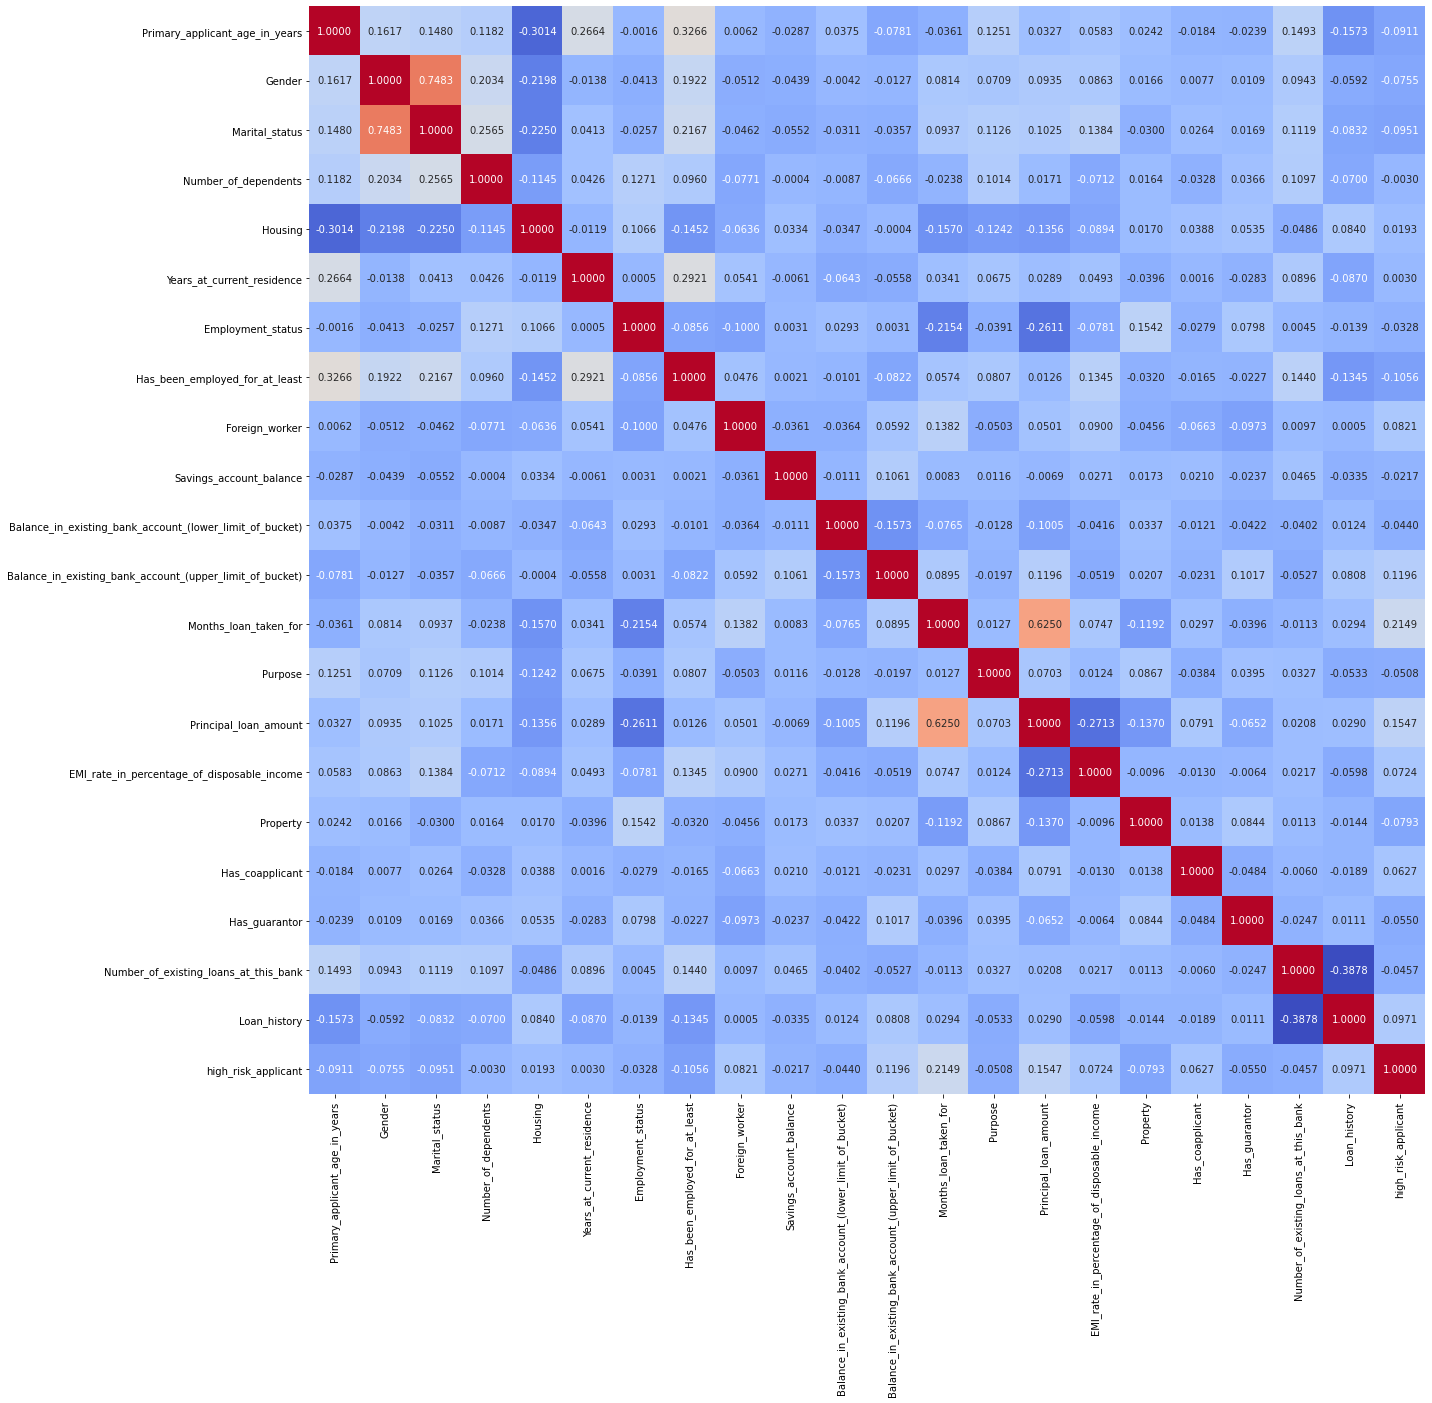

In [86]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)